In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create dummy data with various issues
np.random.seed(42)
data = {
    'CustomerID': [101, 102, 103, 104, 101, 106, 107, 108, 109, 110],
    'Name': ['John', 'Anna', 'Peter', 'Linda', 'John', 'Sara', np.nan, 'Robert', 'Emily', 'Mike'],
    'Age': [25, 32, np.nan, 45, 25, 28, 34, np.nan, 29, 33],
    'Salary': ['50000', '62000', '75000', '42000', '50000', '68000', '72000', '61000', 'NaN', '69000'],
    'Join_Date': ['2020-01-15', '19-03-2021', '2022/07/01', '12-12-2020', '2020-01-15', 
                 '2023-02-28', '2021-06-15', '2022-11-09', '2020-05-20', '2023-04-01'],
    'Country': ['USA', 'UK', 'usa', 'Canada', 'USA', 'UK', 'France', 'canada', 'Germany', 'UK'],
    'Purchase_Category': ['Electronics', 'Clothing', 'Books ', 'electronics', 'clothing', 
                         'Books', 'ELECTRONICS', 'Books', 'Sports', 'clothing'],
    'Weight': [150, 68, 72, 165, 150, 58, 82, 70, 65, 72],
    'Height': [5.9, 5.4, 6.1, 5.11, 5.9, 5.2, 5.7, 5.8, 5.5, 5.9],
    'Active_Member': [1, 'yes', 0, 'no', 1, 'Yes', 1, 'No', 0, 'YES']
}

In [16]:

df = pd.DataFrame(data)

# Display initial data
print("Initial Data:")
print(df.head())
print("\nData Shape:", df.shape)

Initial Data:
   CustomerID   Name   Age Salary   Join_Date Country Purchase_Category  \
0         101   John  25.0  50000  2020-01-15     USA       Electronics   
1         102   Anna  32.0  62000  19-03-2021      UK          Clothing   
2         103  Peter   NaN  75000  2022/07/01     usa            Books    
3         104  Linda  45.0  42000  12-12-2020  Canada       electronics   
4         101   John  25.0  50000  2020-01-15     USA          clothing   

   Weight  Height Active_Member  
0     150    5.90             1  
1      68    5.40           yes  
2      72    6.10             0  
3     165    5.11            no  
4     150    5.90             1  

Data Shape: (10, 10)


In [4]:
# 1. Remove Duplicates
print("\n=== Removing Duplicates ===")
print("Duplicates before:", df.duplicated().sum())


=== Removing Duplicates ===
Duplicates before: 0


In [5]:
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

Duplicates after: 0


In [6]:

# 2. Handle Missing Values
print("\n=== Handling Missing Values ===")
print("Missing values before:")
print(df.isnull().sum())



=== Handling Missing Values ===
Missing values before:
CustomerID           0
Name                 1
Age                  2
Salary               0
Join_Date            0
Country              0
Purchase_Category    0
Weight               0
Height               0
Active_Member        0
dtype: int64


In [18]:
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Name with 'Unknown'
df['Name'] = df['Name'].fillna('Unknown')

print("\nMissing values after:")
print(df.isnull().sum())


Missing values after:
CustomerID           0
Name                 0
Age                  0
Salary               0
Join_Date            0
Country              0
Purchase_Category    0
Weight               0
Height               0
Active_Member        0
dtype: int64


In [19]:
# 3. Correct Data Types
print("\n=== Correcting Data Types ===")
# Clean and convert Salary to numeric
df['Salary'] = df['Salary'].str.replace('[$,]', '', regex=True).replace('NaN', np.nan)
df['Salary'] = pd.to_numeric(df['Salary'])

# Convert Join_Date to datetime
df['Join_Date'] = pd.to_datetime(df['Join_Date'], errors='coerce')


=== Correcting Data Types ===


In [ ]:
# Convert Active_Member to binary
df['Active_Member'] = df['Active_Member'].replace({'yes': 1, 'Yes': 1, 'YES': 1, 'no': 0, 'No': 0})
df['Active_Member'] = df['Active_Member'].astype(int)

print("\nData types after correction:")
print(df.dtypes)

In [ ]:
# 4. Standardize Formats
print("\n=== Standardizing Formats ===")
# Standardize country names
df['Country'] = df['Country'].str.lower()

# Standardize purchase categories
df['Purchase_Category'] = df['Purchase_Category'].str.strip().str.lower()

# 5. Remove Unwanted Characters
df['Purchase_Category'] = df['Purchase_Category'].str.replace('[^a-zA-Z]', '', regex=True)

In [7]:
# 6. Fix Structural Errors
# Ensure Height is in feet with decimal format
df['Height'] = df['Height'].apply(lambda x: round(float(x), 2) if isinstance(x, str) else x)

# 7. Handle Outliers
print("\n=== Handling Outliers ===")
# Identify outliers using Z-score
z_scores = np.abs((df['Weight'] - df['Weight'].mean()) / df['Weight'].std())
outliers = df[z_scores > 3]
print("Outliers detected:", len(outliers))


=== Handling Outliers ===
Outliers detected: 0


In [ ]:
# Cap outliers at 3 standard deviations
df['Weight'] = np.where(z_scores > 3, df['Weight'].mean() + 3*df['Weight'].std(), df['Weight'])

# Visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Weight')
plt.title('Weight Before Outlier Handling')

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Weight')
plt.title('Weight After Outlier Handling')
plt.tight_layout()
plt.show()

# 8. Normalize and Scale Data
scaler = MinMaxScaler()
df['Height_scaled'] = scaler.fit_transform(df[['Height']])

standard_scaler = StandardScaler()
df['Age_standardized'] = standard_scaler.fit_transform(df[['Age']])

In [ ]:
# 9. Correct Inconsistent Data
df['Country'] = df['Country'].replace({'canada': 'canada', 'usa': 'us', 'uk': 'uk'})

# 10. Remove Redundant Features
df = df.drop(columns=['Height_scaled', 'Age_standardized']  # Example removal

# 11. Fix Column Names
df.columns = df.columns.str.lower().str.replace('_', ' ')

In [ ]:
# 12. Validate Data Integrity
assert df['customerid'].is_unique, "CustomerID should be unique"
assert df['join date'].notnull().all(), "Join date should not have null values"

# 13. Handle Date and Time Data
df['join year'] = df['join date'].dt.year
df['join month'] = df['join date'].dt.month_name()

# 14. Standardize Units of Measure
# Convert weight from pounds to kilograms
df['weight'] = df['weight'] * 0.453592

In [ ]:
# 15. Filter Irrelevant Data
df = df[df['join year'] >= 2020]

# Final cleaned data
print("\n=== Final Cleaned Data ===")
print(df.head())
print("\nData Shape after cleaning:", df.shape)

In [ ]:
# Additional visualizations
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='purchase category')
plt.title('Purchase Category Distribution')
plt.xticks(rotation=45)
plt.show()

In [20]:
# =====================
# Descriptive Statistics
# =====================
print("\n=== Descriptive Statistics ===")
numerical_cols = ['Age', 'Salary', 'Weight', 'Height']
categorical_cols = ['Country', 'Purchase_Category', 'Active_Member']

# Numerical statistics
num_stats = df[numerical_cols].describe().transpose()
num_stats['median'] = df[numerical_cols].median()
num_stats['range'] = num_stats['max'] - num_stats['min']
print("\nNumerical Statistics:")
print(num_stats[['count', 'mean', 'median', 'std', 'min', 'max', 'range']])

# Categorical counts
print("\nCategorical Value Counts:")
for col in categorical_cols:
    print(f"\n{col.title()} distribution:")
    print(df[col].value_counts())




=== Descriptive Statistics ===

Numerical Statistics:
        count       mean    median           std       min      max     range
Age      10.0     31.200     30.50      5.726158     25.00     45.0     20.00
Salary    9.0  61000.000  62000.00  11368.817001  42000.00  75000.0  33000.00
Weight   10.0     95.200     72.00     41.898820     58.00    165.0    107.00
Height   10.0      5.651      5.75      0.332347      5.11      6.1      0.99

Categorical Value Counts:

Country distribution:
Country
UK         3
USA        2
usa        1
Canada     1
France     1
canada     1
Germany    1
Name: count, dtype: int64

Purchase_Category distribution:
Purchase_Category
clothing       2
Books          2
Electronics    1
Clothing       1
Books          1
electronics    1
ELECTRONICS    1
Sports         1
Name: count, dtype: int64

Active_Member distribution:
Active_Member
1      3
0      2
yes    1
no     1
Yes    1
No     1
YES    1
Name: count, dtype: int64


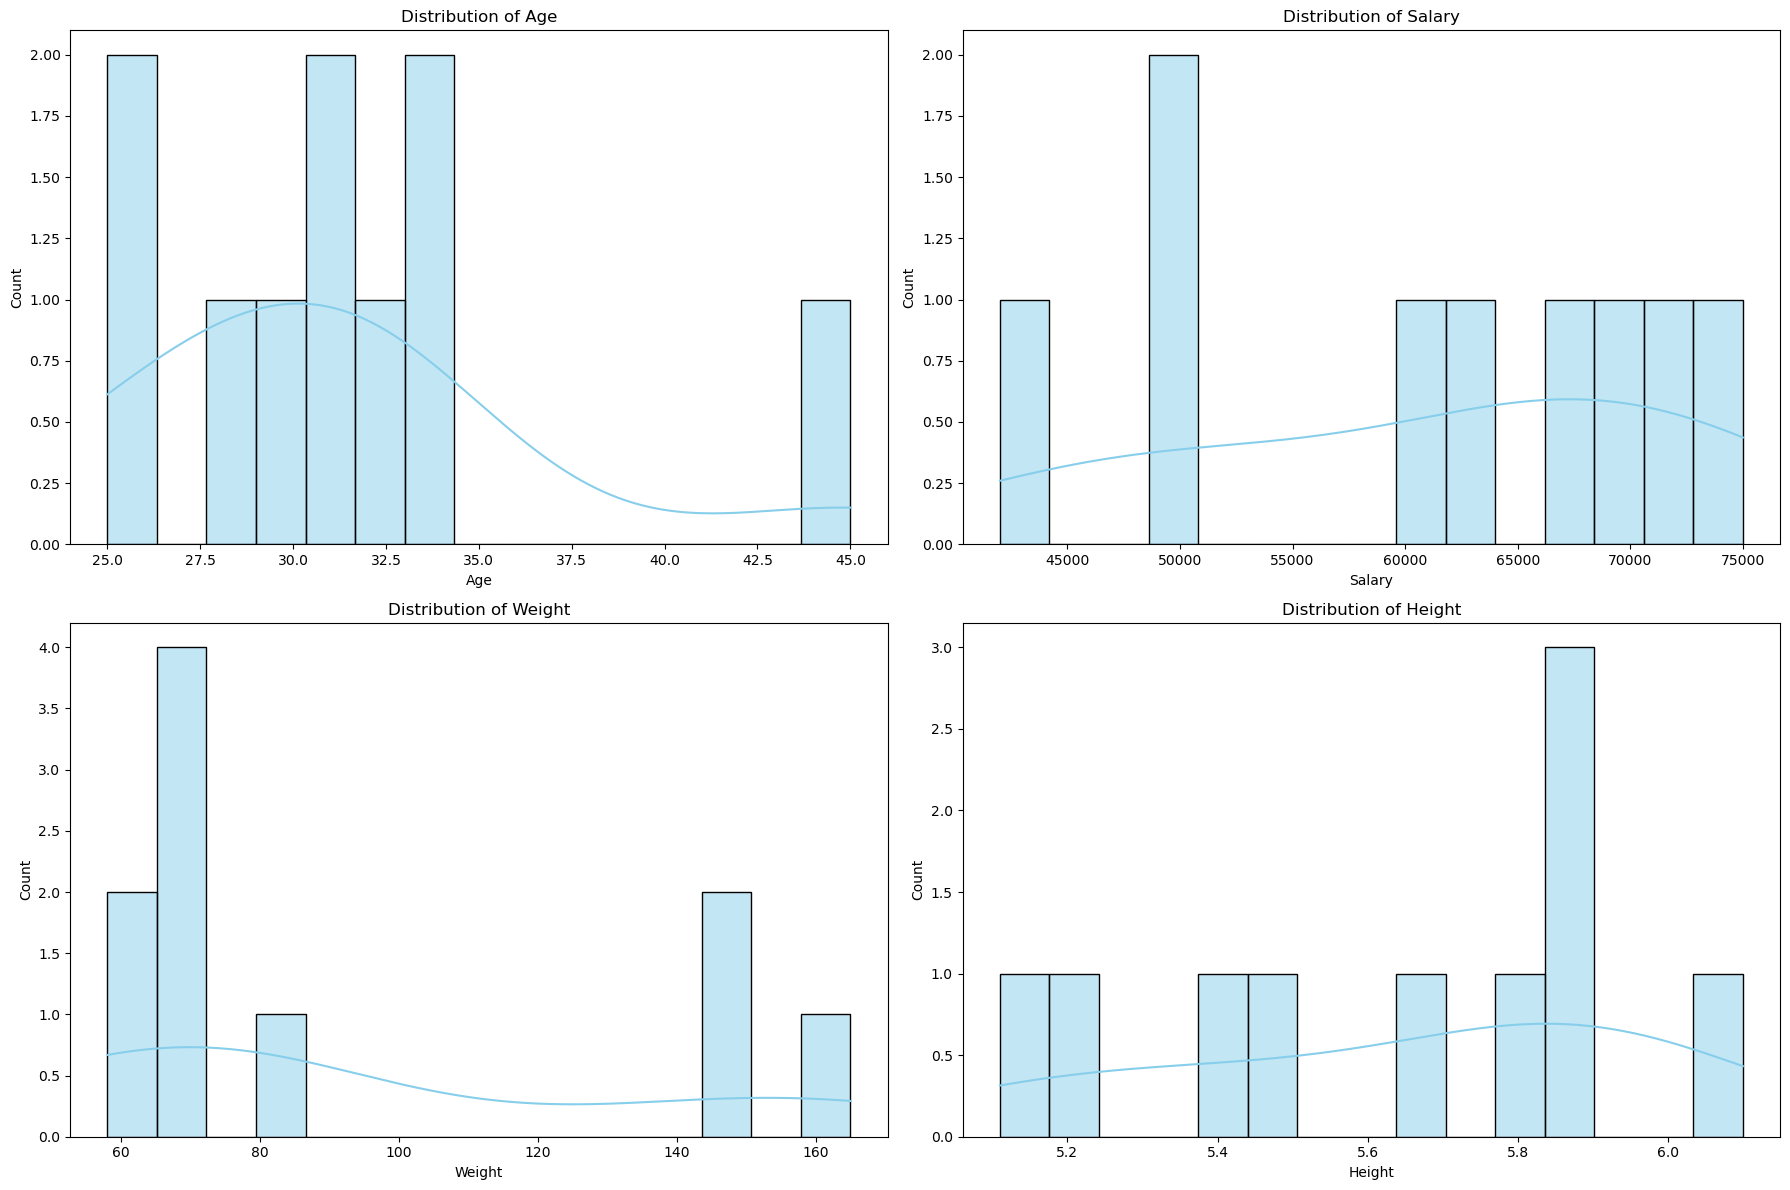

In [21]:
# =================
# Data Visualization
# =================
plt.figure(figsize=(18, 12))

# Histograms for numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col.title()}', fontsize=12)
    plt.xlabel(col.title())
plt.tight_layout()
plt.show()



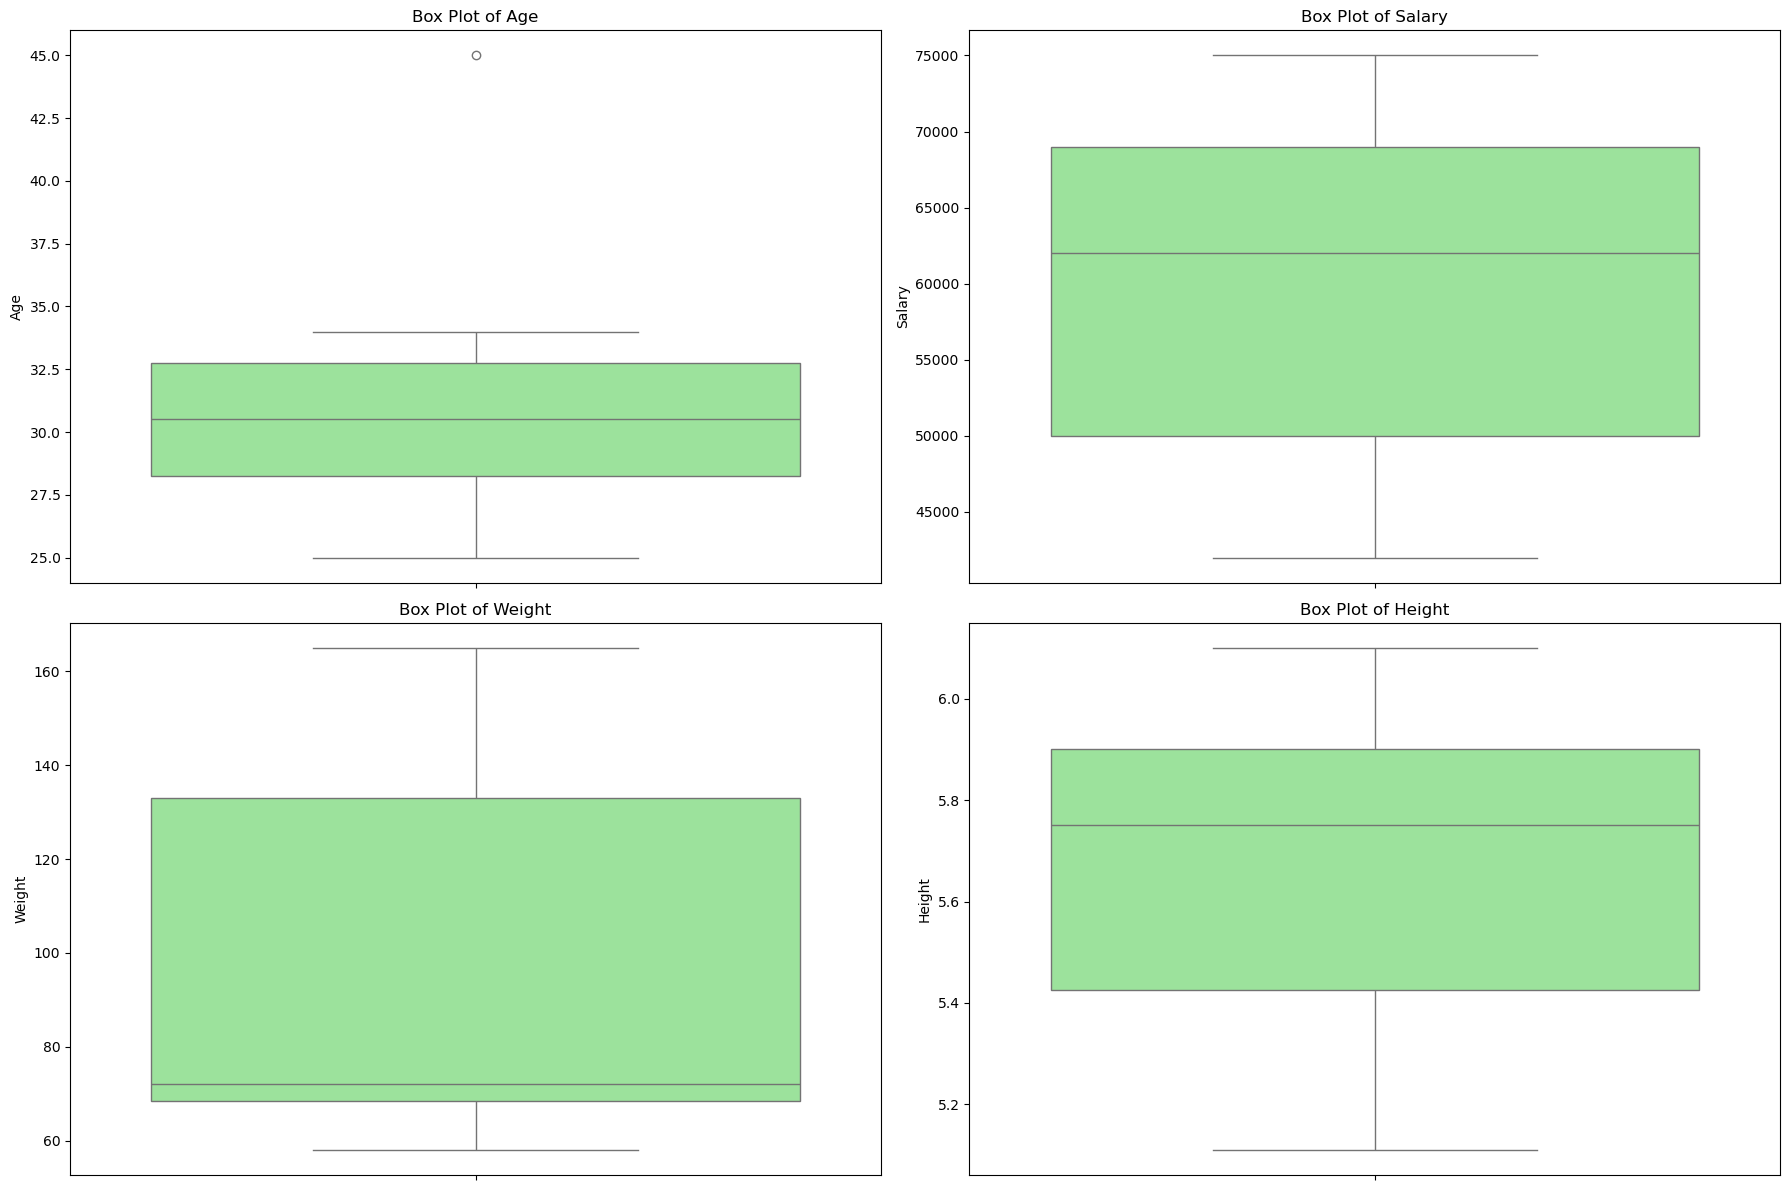

In [22]:
# Box plots for numerical columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col.title()}', fontsize=12)
    plt.ylabel(col.title())
plt.tight_layout()
plt.show()



C:\Users\gimep\AppData\Local\Temp\ipykernel_4876\3824966065.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis')
C:\Users\gimep\AppData\Local\Temp\ipykernel_4876\3824966065.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis')
C:\Users\gimep\AppData\Local\Temp\ipykernel_4876\3824966065.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='viridis')


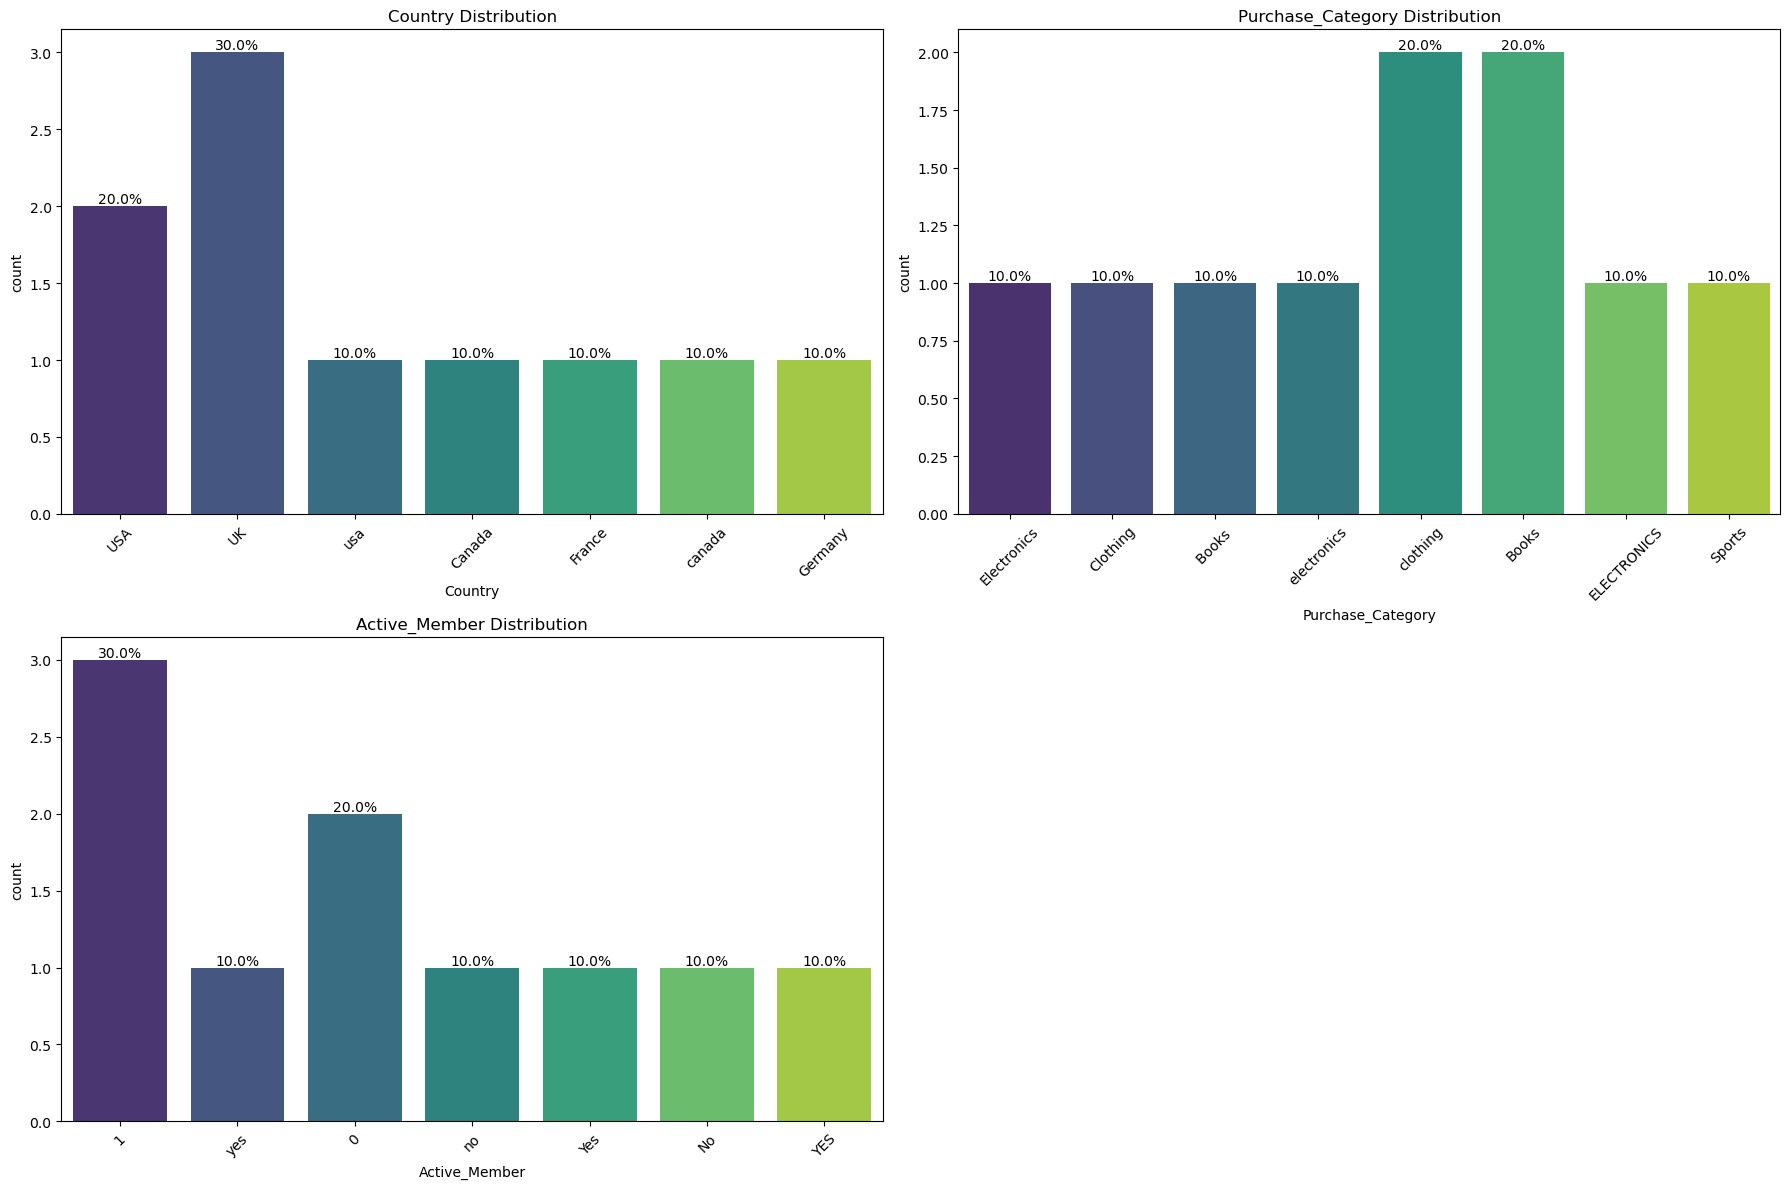

ValueError: Could not interpret value `join year` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [23]:
# Bar charts for categorical columns
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(x=df[col], palette='viridis')
    plt.title(f'{col.title()} Distribution', fontsize=12)
    plt.xlabel(col.title())
    plt.xticks(rotation=45)
    
    # Add percentage labels
    total = len(df[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_height()/total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
        
plt.tight_layout()
plt.show()

# Additional visualization for join year
plt.figure(figsize=(10, 6))
sns.countplot(x='join year', data=df, palette='rocket')
plt.title('Customer Join Year Distribution')
plt.xlabel('Join Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()